1. 

(X_train=80%)
(X_test=20%)

A partir del archivo "iris.csv" que se corresponde con datos relacionados con tres tipos de plantas (el target es el tipo de planta):

- Mediante knn, predice qué planta se corresponde con los ejemplos: [[15.7,2.8,9.5,0.1]] y [[1.7,3.8,4.5,11.3]] para k=3 y k=7
- ¿Qué acierto tiene tu modelo para k=3, k=7? (score)
- Entre 1 y 20, ¿qué k tiene un mejor acierto en tu modelo? visualiza el score con el valor de k en una gráfica.
- Utiliza un conjunto de test con el 60% de los datos: ¿cambian los resultados anteriores? ¿por qué?
- Elimina la clase "Setosa" de tus datos. Repite el proceso anterior, ¿cambian los resultados?
- ¿Consideras Knn un buen algoritmo para estos datos? ¿por qué?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
iris = pd.read_csv("https://raw.githubusercontent.com/Gabvaztor/data_science_apr_2021/main/week9_ML_svm_poly_norm/day3_cicd_encoding_metrics_knn_svm_nlr/knn/data/iris.csv")
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
X =  iris.drop("variety", 1)

In [4]:
le = LabelEncoder()
def encode_columna(columna, encoder):
    variety_encoded = encoder.fit_transform(columna)
    variety_encoded = np.array(variety_encoded)
    return variety_encoded

In [5]:
y = encode_columna(iris["variety"],le)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [7]:
def modelo_knn(n_neighbors, X_set, y_set):
    model = KNeighborsClassifier(n_neighbors)
    model.fit(X_set, y_set)
    return model

In [8]:
def predicting(X_set, y_set, encoder):
    for bors in [3,7]:
        print("#############")
        print(f"fitting Knn with k={bors}")
        print()
        model = modelo_knn(bors, X_set,y_set)
        print(f"getting a score of {round(model.score(X_set, y_set)*100)}%")
        for pred in [[[15.7,2.8,9.5,0.1]],[[1.7,3.8,4.5,11.3]]]:
            print()
            print(f"for the list: {pred} the prediction is {le.inverse_transform(model.predict(pred))[0]}")
        print("#############")

In [9]:
predicting(X_train,y_train, le)

#############
fitting Knn with k=3

getting a score of 98.0%

for the list: [[15.7, 2.8, 9.5, 0.1]] the prediction is Virginica

for the list: [[1.7, 3.8, 4.5, 11.3]] the prediction is Virginica
#############
#############
fitting Knn with k=7

getting a score of 99.0%

for the list: [[15.7, 2.8, 9.5, 0.1]] the prediction is Virginica

for the list: [[1.7, 3.8, 4.5, 11.3]] the prediction is Virginica
#############


**Entre 1 y 20, ¿qué k tiene un mejor acierto en tu modelo? visualiza el score con el valor de k en una gráfica.**

([<matplotlib.axis.XTick at 0x2655f2252b0>,
 <a list of 5 Text major ticklabel objects>)

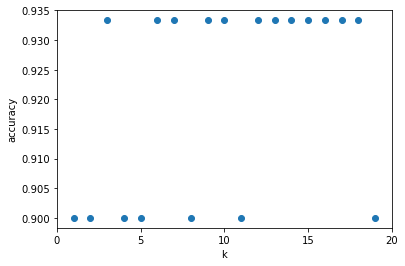

In [10]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

**Utiliza un conjunto de test con el 60% de los datos: ¿cambian los resultados anteriores? ¿por qué?**

In [11]:
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X, y, test_size=0.60)

In [12]:
predicting(X_2_train, y_2_train, le)

#############
fitting Knn with k=3

getting a score of 100.0%

for the list: [[15.7, 2.8, 9.5, 0.1]] the prediction is Virginica

for the list: [[1.7, 3.8, 4.5, 11.3]] the prediction is Virginica
#############
#############
fitting Knn with k=7

getting a score of 97.0%

for the list: [[15.7, 2.8, 9.5, 0.1]] the prediction is Virginica

for the list: [[1.7, 3.8, 4.5, 11.3]] the prediction is Virginica
#############


**Elimina la clase "Setosa" de tus datos. Repite el proceso anterior, ¿cambian los resultados?**

In [13]:
iris_no_setosa = iris[~(iris.variety == "Setosa")]
iris_no_setosa.variety.unique()

array(['Versicolor', 'Virginica'], dtype=object)

In [14]:
X = iris_no_setosa.drop("variety", 1)
y = encode_columna(iris_no_setosa["variety"], le)

In [15]:
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X, y, test_size=0.20)

In [16]:
predicting(X_3_train, y_3_train, le)

#############
fitting Knn with k=3

getting a score of 96.0%

for the list: [[15.7, 2.8, 9.5, 0.1]] the prediction is Virginica

for the list: [[1.7, 3.8, 4.5, 11.3]] the prediction is Virginica
#############
#############
fitting Knn with k=7

getting a score of 98.0%

for the list: [[15.7, 2.8, 9.5, 0.1]] the prediction is Virginica

for the list: [[1.7, 3.8, 4.5, 11.3]] the prediction is Virginica
#############
